# Linear Regression GD

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#from sklearn.linear_model import LinearRegression unprofessional way 
from sklearn import linear_model as lin 
from sklearn import preprocessing as pre
from sklearn import metrics as met
from sklearn import model_selection as mod
from sklearn import pipeline as pip

* Create a fake data in the trajectory of y=3x+4 with normal distributed errors.

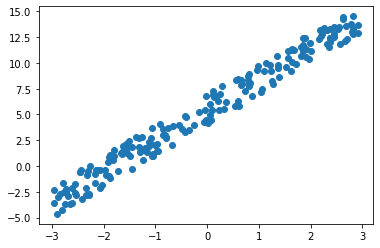

In [2]:
m = 200
np.random.seed(42)
x =np.random.rand(m,1) * 6 -3 #generates random float in 0 and 1 with size of m and 1
# its between [0,1) , if we multiply it by 6 it will generate values between 0 and 6
# if we subtract 3 from the value we get random values between -3 and 3
y=3*x+4 + 3*np.random.rand(m,1)
#if we make y = 3x+4, we would have no error
#if we add just a random value the graph will move up
# we need to add different errors every time 
#to increase the error we can multiply the random vlaue
plt.scatter(x,y)

In [3]:
x[:3]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365]])

In [4]:
ones_vect = np.ones((m,1))
x_2 = np.concatenate((ones_vect,x),axis=1)
x_2[:3] #adding the intercept coefficient.

array([[ 1.        , -0.75275929],
       [ 1.        ,  2.70428584],
       [ 1.        ,  1.39196365]])

In [5]:
theta = np.linalg.inv(x_2.T.dot(x_2)).dot(x_2.T).dot(y) #transpose the vector, then take its dot product then invert it
# then take dot product of x_2 transposed and then dot product of y
#in order to do dot product the shapes of the vectors should be x,y and y,z and result would be x,z


In [6]:
theta

array([[5.5118436 ],
       [2.98664262]])

In [7]:
# y = 4 + 3*x Theta0 = 4 Theta1 = 3
# but since we have added values, we get 5.5 and 2.9 instead of 4 and 3

In [8]:
theta.shape

(2, 1)

In [9]:
x_2.shape

(200, 2)

In [10]:
y_pred = x_2.dot(theta) #predictions in 200,1 dimensions each
y_pred.shape

(200, 1)

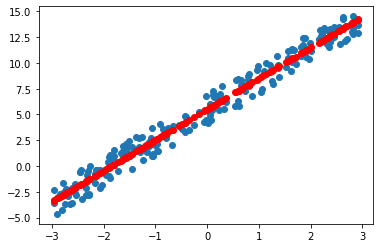

In [11]:
plt.scatter(x,y)
plt.scatter(x,y_pred,color="red")
#blue one is our data and red one is our model

* sklearn

In [12]:
lin_reg = lin.LinearRegression()
#create the model 
lin_reg.fit(x,y)

LinearRegression()

In [13]:
lin_reg.intercept_ #theta 0 value

array([5.5118436])

In [14]:
lin_reg.coef_ 

array([[2.98664262]])

In [15]:
# same values we found

In [16]:
x_test1=[0.3] #takes list of samples, cant be single array must be array of arrays.
x_test2=[-1.27]
lin_reg.predict([x_test1,x_test2]) #takes x values

array([[6.40783638],
       [1.71880748]])

# Batch Gradient Descent

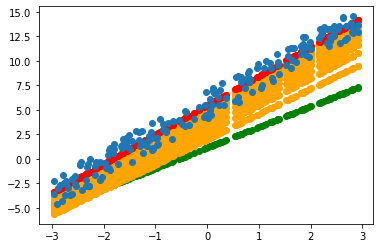

array([[5.44714692],
       [2.98372575]])

In [17]:
# randomly initialize theta values
theta = np.random.rand(2,1)
eta = 0.1 #learning speed
n_steps=20 #number of steps

for i in range(n_steps):
    #compute the gradient
    gradient = (2/m)*x_2.T.dot(x_2.dot(theta)-y) #need to use the X with 1 value added to the beginning
    #update theta values
    theta=theta-eta*gradient

    y_pred = x_2.dot(theta)
    if i == 0:
        myColor = "green" #first try color
    elif i == n_steps-1:
        myColor="red" #last try color
    else:
        myColor="orange"
    plt.scatter(x,y_pred,color=myColor)
plt.scatter(x,y)
plt.show()
theta

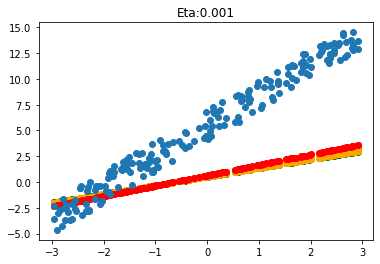

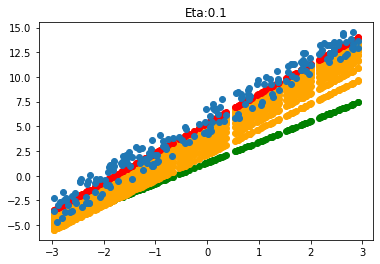

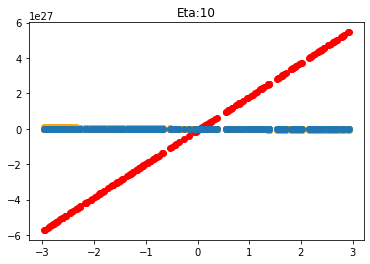

array([[-8.55377037e+25],
       [ 1.89725134e+27]])

In [18]:
for eta in [0.001,0.1,10]:
    # randomly initialize theta values
    theta = np.random.rand(2,1)
    n_steps=15 #number of steps

    for i in range(n_steps):
        #compute the gradient
        gradient = (2/m)*x_2.T.dot(x_2.dot(theta)-y) #need to use the X with 1 value added to the beginning
        #update theta values
        theta=theta-eta*gradient

        y_pred = x_2.dot(theta)
        if i == 0:
            myColor = "green" #first try color
        elif i == n_steps-1:
            myColor="red" #last try color
        else:
            myColor="orange"
        plt.scatter(x,y_pred,color=myColor)
    plt.scatter(x,y)
    plt.title("Eta:"+str(eta))
    plt.show()
theta

# Stochastic Gradient Descent (SGD)

array([[5.30547148],
       [2.69085947]])

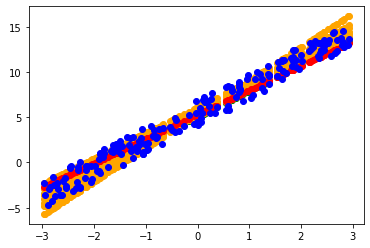

In [19]:
theta = np.random.rand(2,1)
eta = 0.1
epoch_num = 10

for j in range(epoch_num): #times epoch num epoch operations
    for i in range(m): #completing this loop for m times means 1 epoch
        rand_idx = np.random.randint(0,m) #random index selection
        rand_sample = x_2[rand_idx:rand_idx+1] #to return list of list
        rand_y = y[rand_idx:rand_idx+1]
        gradient=2 * rand_sample.T.dot(rand_sample.dot(theta)-rand_y)
        theta = theta - eta*gradient
    y_pred=x_2.dot(theta)
    if j == 0:
        myColor="green"
    elif j == epoch_num-1:
        myColor="red"
    else:
        myColor="orange"
        
    plt.scatter(x,y_pred,color=myColor)
plt.scatter(x,y,color="Blue")
theta

array([[5.75328107],
       [3.07577579]])

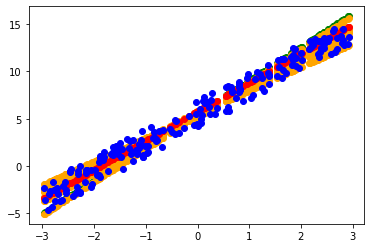

In [20]:
# simulated annealing

def returnLearningRate(t):
    return 100 /(1000+t) #as t increases returns lower values

theta = np.random.rand(2,1)
# eta = 0.1
epoch_num = 10

for j in range(epoch_num): #times epoch num epoch operations
    for i in range(m): #completing this loop for m times means 1 epoch
        rand_idx = np.random.randint(0,m) #random index selection
        rand_sample = x_2[rand_idx:rand_idx+1] #to return list of list
        rand_y = y[rand_idx:rand_idx+1]
        gradient=2 * rand_sample.T.dot(rand_sample.dot(theta)-rand_y)
        eta = returnLearningRate(m * j + i)
        theta = theta - eta*gradient
    y_pred=x_2.dot(theta)
    if j == 0:
        myColor="green"
    elif j == epoch_num-1:
        myColor="red"
    else:
        myColor="orange"
        
    plt.scatter(x,y_pred,color=myColor)
plt.scatter(x,y,color="Blue")
theta

# sgd with sklearn

In [21]:
y.shape #regressor doesnt like when y is list of lists

(200, 1)

In [22]:
y[:3]

array([[ 3.66781708],
       [12.36527741],
       [ 8.66077709]])

In [23]:
y.ravel()[:3]

array([ 3.66781708, 12.36527741,  8.66077709])

In [24]:
sgd_reg = lin.SGDRegressor(penalty="l2",alpha=0.001, early_stopping=True, eta0=0.1,
                            random_state=42, max_iter=100)
sgd_reg.fit(x,y.ravel())

SGDRegressor(alpha=0.001, early_stopping=True, eta0=0.1, max_iter=100,
             random_state=42)

In [25]:
sgd_reg.intercept_

array([5.53767349])

In [26]:
sgd_reg.coef_

array([3.02125366])

In [27]:
#standartization
scaler = pre.StandardScaler()
#scaler.fit(x) # calculating mean and std for each feature
#x_scaled=scaler.transform(x) 
x_scaled = scaler.fit_transform(x)

In [28]:
#model learning
sgd_reg=lin.SGDRegressor(random_state=42)
sgd_reg.fit(x_scaled,y.ravel())


SGDRegressor(random_state=42)

In [29]:
#test the performance
y_pred = sgd_reg.predict(x_scaled)
rmse_score = met.mean_squared_error(y,y_pred,squared=False)
print(rmse_score)
#this is a wrong approach because we tested algorithm with data we trained it with

0.8765664836903745


In [30]:
x_train,x_test,y_train,y_test = mod.train_test_split(x,y,test_size=0.25,random_state=42)

In [31]:
#scale train data
scaler = pre.StandardScaler() 
x_train_scaled=scaler.fit_transform(x_train)
#model learning
sgd_reg = lin.SGDRegressor(random_state=42)
sgd_reg.fit(x_train_scaled, y_train.ravel())
#scale test data 
#test datasını scale ederken train datasının scalerına göre scale etmemiz gerekir
scaler2=pre.StandardScaler()
x_test_scaled = scaler2.fit_transform(x_test)
#make predictions
y_pred=sgd_reg.predict(x_test_scaled)
rmse_score=met.mean_squared_error(y_test,y_pred,squared=False)
print(rmse_score)

#yanlış yaklaşım

0.8018509919287758


In [32]:
# correct approach

#scale train data
scaler = pre.StandardScaler() 
x_train_scaled=scaler.fit_transform(x_train)
#model learning
sgd_reg = lin.SGDRegressor(random_state=42)
sgd_reg.fit(x_train_scaled, y_train.ravel())
#scale test data 
#test datasını scale ederken train datasının scalerına göre scale etmemiz gerekir
x_test_scaled = scaler.transform(x_test)#sadece transform edeceğiz train ettiğimiz scaler'ı
#make predictions
y_pred=sgd_reg.predict(x_test_scaled)
rmse_score=met.mean_squared_error(y_test,y_pred,squared=False)
print(rmse_score)

0.8038038371186007


# pipeline

In [ ]:
myPipeline = pip.Pipeline([
    (), #needs to be fit and transform
    (), #needs to be fit and transform
    (), #needs to be fit and transform
    ...
    (), #fit is mandatory for last step
])

In [34]:
pipe = pip.Pipeline([
    ("scaler", pre.StandardScaler()), #anything besides last one needs to have transform and fit method
    ("sgd", lin.SGDRegressor(random_state=42)), #last one needs to have fit method
])

pipe.fit(x_train,y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(random_state=42))])

In [35]:
y_pred = pipe.predict(x_test)
myScore = met.mean_squared_error(y_test,y_pred, squared=False)
print(myScore)

0.8038038371186007


In [36]:
pipe2 = pip.Pipeline([
    ("scaler", pre.StandardScaler())
])

pipe2.fit(x_train)
x_test_scaled = pipe2.transform(x_test)

# Cross Validation Using a Pipeline

In [41]:
pipe = pip.Pipeline([
    ("scaler", pre.StandardScaler()), #anything besides last one needs to have transform and fit method
    ("sgd", lin.SGDRegressor(random_state=42)), #last one needs to have fit method
])

mod.cross_val_score(pipe, x_train, y_train.ravel(), cv=3, n_jobs=-1, scoring="neg_root_mean_squared_error") 
#estimator, train data, train results, cross validation number, paralell operations, scoring (default is accuracy)

array([-0.92887543, -0.94972758, -0.85046609])

In [46]:

for a in [0.001,0.01,0.1]: #alfa = modeli ne kadar regularize etmek istiyoruz
    pipe = pip.Pipeline([
        ("scaler", pre.StandardScaler()), #anything besides last one needs to have transform and fit method
        ("sgd", lin.SGDRegressor(alpha=a,random_state=42)), #last one needs to have fit method
    ])

    myScore = mod.cross_val_score(pipe, x_train, y_train.ravel(), cv=3, scoring="neg_root_mean_squared_error").mean()*-1
    print("alpha:",a,"score:",myScore)

alpha: 0.001 score: 0.9098545955563481
alpha: 0.01 score: 0.9123382589918284
alpha: 0.1 score: 1.0317985563235503


# Grid Search

In [49]:
pipe = pip.Pipeline([
    ("scaler", pre.StandardScaler()), #anything besides last one needs to have transform and fit method
    ("sgd", lin.SGDRegressor(random_state=42)), #last one needs to have fit method
])

myParams = {
    "sgd__alpha":[0.001,0.01,0.1],
    "sgd__penalty":["l1","l2"],
    "sgd__eta0":[0.01,0.1,1]
}
grid = mod.GridSearchCV(pipe, myParams, scoring="neg_root_mean_squared_error", cv=3)
grid.fit(x_train,y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sgd', SGDRegressor(random_state=42))]),
             param_grid={'sgd__alpha': [0.001, 0.01, 0.1],
                         'sgd__eta0': [0.01, 0.1, 1],
                         'sgd__penalty': ['l1', 'l2']},
             scoring='neg_root_mean_squared_error')

In [50]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sgd__alpha,param_sgd__eta0,param_sgd__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000687,0.000972,0.002671,0.003777,0.001,0.01,l1,"{'sgd__alpha': 0.001, 'sgd__eta0': 0.01, 'sgd_...",-0.928967,-0.949655,-0.850499,-0.909707,0.042710,5
1,0.002666,0.003771,0.002669,0.003774,0.001,0.01,l2,"{'sgd__alpha': 0.001, 'sgd__eta0': 0.01, 'sgd_...",-0.929743,-0.949025,-0.850796,-0.909855,0.042496,6
2,0.005334,0.003772,0.000000,0.000000,0.001,0.1,l1,"{'sgd__alpha': 0.001, 'sgd__eta0': 0.1, 'sgd__...",-0.919022,-0.951828,-0.853015,-0.907955,0.041092,1
3,0.002666,0.003771,0.000000,0.000000,0.001,0.1,l2,"{'sgd__alpha': 0.001, 'sgd__eta0': 0.1, 'sgd__...",-0.919542,-0.951126,-0.853240,-0.907969,0.040791,2
4,0.002667,0.003772,0.000000,0.000000,0.001,1,l1,"{'sgd__alpha': 0.001, 'sgd__eta0': 1, 'sgd__pe...",-0.982550,-0.949641,-0.909004,-0.947065,0.030080,11
5,0.002666,0.003770,0.000000,0.000000,0.001,1,l2,"{'sgd__alpha': 0.001, 'sgd__eta0': 1, 'sgd__pe...",-0.984362,-0.949213,-0.909603,-0.947726,0.030538,12
6,0.002667,0.003772,0.000000,0.000000,0.01,0.01,l1,"{'sgd__alpha': 0.01, 'sgd__eta0': 0.01, 'sgd__...",-0.930698,-0.949031,-0.851162,-0.910297,0.042479,7
7,0.005338,0.003775,0.002664,0.003768,0.01,0.01,l2,"{'sgd__alpha': 0.01, 'sgd__eta0': 0.01, 'sgd__...",-0.938212,-0.944352,-0.854451,-0.912338,0.041009,8
8,0.003357,0.003422,0.000000,0.000000,0.01,0.1,l1,"{'sgd__alpha': 0.01, 'sgd__eta0': 0.1, 'sgd__p...",-0.920156,-0.950404,-0.853507,-0.908022,0.040478,3
9,0.002657,0.003758,0.000000,0.000000,0.01,0.1,l2,"{'sgd__alpha': 0.01, 'sgd__eta0': 0.1, 'sgd__p...",-0.926701,-0.944806,-0.857187,-0.909564,0.037767,4


In [51]:
grid.best_score_

-0.9079549048387147

In [52]:
grid.best_params_

{'sgd__alpha': 0.001, 'sgd__eta0': 0.1, 'sgd__penalty': 'l1'}

In [53]:
#best parameters estimator
grid.best_estimator_.predict(x_test)

array([ 5.3493831 , -0.23239664,  7.39494213,  0.74287896, -3.40554934,
       12.14095315, 14.2166714 ,  8.65410677,  8.07160738,  8.38360427,
       -0.9963219 , 13.09824558, 11.49072018,  2.91573875, 11.16558125,
        3.42411282, -1.93920442, -0.92491754,  2.41998724, -2.18992161,
        0.5684005 ,  1.94063487, -2.60482471,  6.56290839,  6.2287632 ,
        3.45903489,  2.06184207, 10.89538191,  4.15013264, -1.37502448,
        9.20273767,  4.23712081, 13.04754446,  9.57920554, 12.80282478,
       12.79024722,  2.28160597,  9.11185817, -1.90688405, 10.33922657,
       -1.4468903 , 12.60221256,  8.77402973,  4.67096137,  2.18810385,
        2.74928483, -2.69524959,  1.70661954,  1.88014108,  9.58997758])

# Polynomial Data

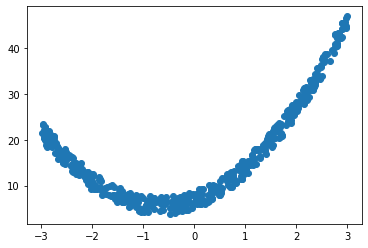

In [59]:
m = 500
X = np.random.rand(m,1) * 6 - 3
y=3*X ** 2 + 4 * X + 5 + 4*np.random.rand(m,1)

plt.scatter(X,y)

In [60]:
X_train,X_test,y_train,y_test = mod.train_test_split(X,y,test_size=0.25,random_state=42)

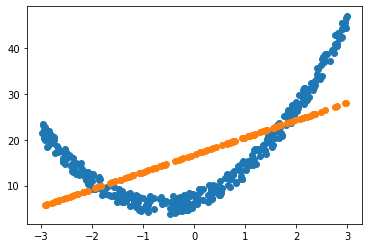

In [61]:
pipe = pip.Pipeline([
    ("scaler",pre.StandardScaler()),
    ("sgd",lin.SGDRegressor(random_state=42))
])

pipe.fit(X_train,y_train.ravel())
y_pred=pipe.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_test,y_pred)
plt.show()

#eğer veri underfit oluyorsa regulations azaltılması ve modelin komplexleştirmesi gereklidir.

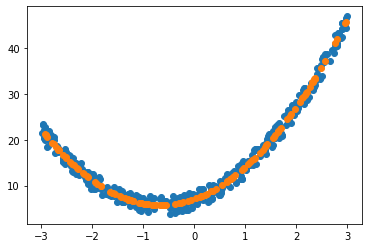

In [74]:
pipe = pip.Pipeline([
    ("poly",pre.PolynomialFeatures(degree=2)),
    ("scaler",pre.StandardScaler()),
    ("sgd",lin.SGDRegressor(random_state=42))
])

pipe.fit(X_train,y_train.ravel())
y_pred=pipe.predict(X_test)

plt.scatter(X_train,y_train)
plt.scatter(X_test,y_pred)
plt.show()


In [75]:
#underfitting model
pipe = pip.Pipeline([
    ("scaler",pre.StandardScaler()),
    ("sgd",lin.SGDRegressor(random_state=42))
])

pipe.fit(X_train,y_train.ravel())
y_pred_train=pipe.predict(X_train) 
train_score = met.mean_squared_error(y_train,y_pred_train,squared=False)
print("train score is", train_score)
y_pred_test = pipe.predict(X_test)
test_score = met.mean_squared_error(y_test,y_pred_test,squared=False)
print("test score is",test_score)

train score is 8.408266678158846
test score is 7.9591695276602215


In [76]:
#fitting model
pipe = pip.Pipeline([
    ("poly",pre.PolynomialFeatures(degree=2)),
    ("scaler",pre.StandardScaler()),
    ("sgd",lin.SGDRegressor(random_state=42))
])

pipe.fit(X_train,y_train.ravel())
y_pred_train=pipe.predict(X_train) 
train_score = met.mean_squared_error(y_train,y_pred_train,squared=False)
print("train score is", train_score)
y_pred_test = pipe.predict(X_test)
test_score = met.mean_squared_error(y_test,y_pred_test,squared=False)
print("test score is",test_score)

train score is 1.1545378098332286
test score is 1.1245462163837812


# Learning Curves

In [86]:
def plotLearningCurve(est, X_train, y_train, X_test, y_test, n_iter=10, minY=0,maxY=1):
    x_values = [] #number of training samples
    y_values_train = []
    y_values_test = []

    for i in np.linspace(10,len(X_train),n_iter): #increase training sizes by every iter
        i=int(i)
        #select a subset of training data
        X_train_temp = X_train[:i]
        y_train_temp = y_train[:i]
        #create the model
        est.fit(X_train_temp, y_train_temp)
        #evaluate train set
        y_pred_train=est.predict(X_train_temp)
        train_score = met.mean_squared_error(y_train_temp,y_pred_train,squared=False)
        #evaluate test set
        y_pred_test=est.predict(X_test)
        test_score = met.mean_squared_error(y_test,y_pred_test,squared=False)
        #populate lists
        y_values_train.append(train_score)
        y_values_test.append(test_score)
        x_values.append(i)
    plt.figure(figsize=(10,6))
    plt.plot(x_values,y_values_train,label="Train")
    plt.plot(x_values,y_values_test, label="Test")
    plt.legend()
    plt.ylabel("RMSE")
    plt.xlabel("# of training samples")
    plt.grid(True)
    plt.ylim(minY,maxY)
    plt.show()




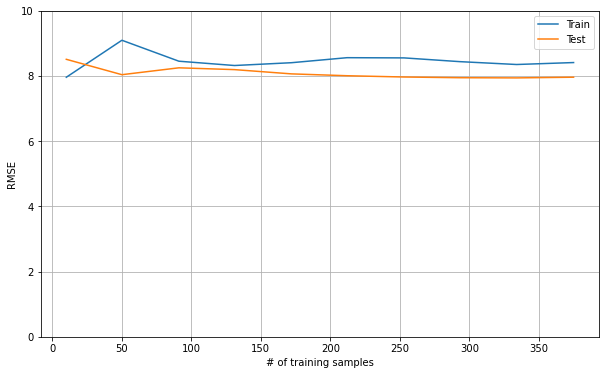

In [89]:
pipe = pip.Pipeline([
    ("scaler",pre.StandardScaler()),
    ("sgd",lin.SGDRegressor(random_state=42))
])
plotLearningCurve(pipe, X_train, y_train.ravel(), X_test, y_test.ravel(), n_iter=10,maxY=10)

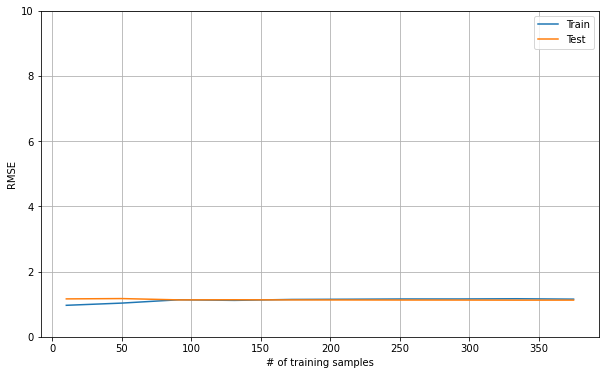

In [90]:
pipe_poly = pip.Pipeline([
    ("poly",pre.PolynomialFeatures(degree=2)),
    ("scaler",pre.StandardScaler()),
    ("sgd",lin.SGDRegressor(random_state=42))
])
plotLearningCurve(pipe_poly, X_train, y_train.ravel(), X_test, y_test.ravel(), n_iter=10,maxY=10)